In [ ]:
# dataset uploaded on dropbox
# we will download our dataset by this link - http://cb.lk//covid_19


!wget http://cb.lk//covid_19

In [ ]:
# unzip the folder

!unzip covid_19

In [ ]:
# Train path 

TRAIN_PATH = "CovidDataset/Train"

# Val path

VAL_PATH = "CovidDataset/Test"


In [ ]:
# import

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
import tensorflow as tf
import os

assert tf.__version__.startswith('2')

from keras.preprocessing import *


# CNN Based Model in Keras

In [ ]:

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (224,224,3)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

## Train the Model

In [ ]:
# Train from Scratch

train_datagen = image.ImageDataGenerator(
    rescale = 1/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset  = image.ImageDataGenerator(rescale=1./255)


train_generator  = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [ ]:
train_generator.class_indices


{'Covid': 0, 'Normal': 1}

In [ ]:

validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'

)

Found 60 images belonging to 2 classes.


In [ ]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'Covid': 0, 'Normal': 1}


In [ ]:
!cat labels.txt

Covid
Normal

In [ ]:
validation_generator.class_indices


{'Covid': 0, 'Normal': 1}

In [ ]:
# number of training images we have are

train_generator.n

224

In [ ]:
# number of test images we have are  

validation_generator.n

60

In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 6,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
6/6 [==============================] - 8s 1s/step - loss: 1.6440 - accuracy: 0.4688 - val_loss: 0.6891 - val_accuracy: 0.9333
Epoch 2/10
6/6 [==============================] - 7s 1s/step - loss: 0.6737 - accuracy: 0.5781 - val_loss: 0.6738 - val_accuracy: 0.9333
Epoch 3/10
6/6 [==============================] - 7s 1s/step - loss: 0.6293 - accuracy: 0.6927 - val_loss: 0.5761 - val_accuracy: 0.8167
Epoch 4/10
6/6 [==============================] - 7s 1s/step - loss: 0.5106 - accuracy: 0.7552 - val_loss: 0.3889 - val_accuracy: 0.9333
Epoch 5/10
6/6 [==============================] - 7s 1s/step - loss: 0.3290 - accuracy: 0.8594 - val_loss: 0.1967 - val_accuracy: 0.9500
Epoch 6/10
6/6 [==============================] - 7s 1s/step - loss: 0.2679 - accuracy: 0.9010 - val_loss: 0.1585 - val_accuracy: 0.9333
Epoch 7/10
6/6 [==============================] - 7s 1s/step - loss: 0.1846 - accuracy: 0.9062 - val_l

# Loss is very Less


In [ ]:
model.save('model_advance.h5')

In [ ]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('covid_model.tflite', 'wb') as f:
  f.write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: save/fine_tuning/assets


In [ ]:
from google.colab import files

files.download('covid_model.tflite')
files.download('labels.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.09385678917169571, 0.9732142686843872]

# Test Images

In [ ]:
model = load_model('model_advance.h5')

In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:

y_actual = []
y_test = []

In [ ]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
    img = image.load_img("./CovidDataset/Val/Normal/" + i , target_size=(224,224) )
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p= model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)

In [ ]:

for i in os.listdir("./CovidDataset/Val/Covid/"):
    img = image.load_img("./CovidDataset/Val/Covid/"+ i, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(0)


In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cm = confusion_matrix(y_actual, y_test)

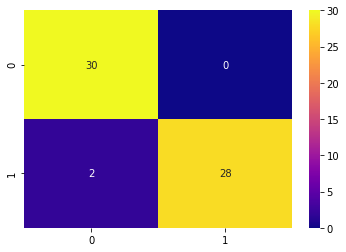

In [ ]:
sns.heatmap(cm, cmap='plasma', annot=True)
